In [1]:
!head tabernas_meteo_data.txt

FECHA    DIA Al04TMax Al04TMin Al04TMed Al04Precip 
-------- --- -------- -------- -------- ---------- 
13-12-16 348     14.6      4.0      8.9        0.2 
12-12-16 347     15.9      3.0      8.7        0.2 
11-12-16 346     16.9      5.0     10.2        0.2 
10-12-16 345     16.4      6.3     10.9        0.2 
09-12-16 344     13.6      9.5     11.2        1.8 
08-12-16 343     14.5      5.4     10.4        0.0 
07-12-16 342     15.7      6.1     10.1        0.2 
06-12-16 341     17.7      7.1     13.4        0.0 


In [2]:
!tail tabernas_meteo_data.txt

10-01-04  10     20.4      5.8     12.2        0.0 
09-01-04   9     20.3      7.2     14.0        0.0 
08-01-04   8     19.9      6.1     13.0        0.0 
07-01-04   7     16.0      1.4      8.3        0.0 
06-01-04   6     16.5      0.4      6.8        0.0 
05-01-04   5     16.4      0.6      7.1        0.0 
04-01-04   4     16.2     -0.4      7.2        0.0 
03-01-04   3     15.1      0.8      7.9        0.0 
02-01-04   2     17.4      5.7     10.6        0.0 
01-01-04   1     18.0      2.5     11.1        0.0 


In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
pd.read_csv("tabernas_meteo_data.txt").head(5)

,FECHA DIA Al04TMax Al04TMin Al04TMed Al04Precip
0,-------- --- -------- -------- -------- ------...
1,13-12-16 348 14.6 4.0 8.9 ...
2,12-12-16 347 15.9 3.0 8.7 ...
3,11-12-16 346 16.9 5.0 10.2 ...
4,10-12-16 345 16.4 6.3 10.9 ...


Cambios a realizar:


*   Separar los campos por un número de espacios
*   Saltar las primeras líneas
*   Dar nombres nuevos a cada columna
*   Descartar la columna Día del Año
*   Definir las fechas en un formato adecuado







In [10]:
data = pd.read_csv(
    "tabernas_meteo_data.txt",
    sep = r"\s+",
    usecols = (0,2,3,4,5),
    skiprows = 2,
    names = ['DATE', 'TMAX', 'TMIN', 'TMED', 'PRECIP'],
    parse_dates = ['DATE'],
    date_format = "%D-%M-%Y",
    index_col = ['DATE'],
)

In [11]:
data.sort_index(inplace=True)
data.head()

,TMAX,TMIN,TMED,PRECIP
DATE,,,,
01-01-04,18.0,2.5,11.1,0.0
01-01-05,17.3,-0.2,7.1,0.0
01-01-06,15.4,3.4,11.9,0.0
01-01-07,18.8,1.9,8.7,0.0
01-01-08,12.5,-1.1,4.9,0.2


In [12]:
data.dtypes

,0
TMAX,float64
TMIN,float64
TMED,float64
PRECIP,float64


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4732 entries, 01-01-04 to 31-12-15
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TMAX    4713 non-null   float64
 1   TMIN    4713 non-null   float64
 2   TMED    4713 non-null   float64
 3   PRECIP  4713 non-null   float64
dtypes: float64(4)
memory usage: 184.8+ KB


In [14]:
data.describe()

,TMAX,TMIN,TMED,PRECIP
count,4713.000000,4713.000000,4713.000000,4713.000000
mean,23.224761,9.676872,16.276321,0.650583
std,7.318656,6.263303,6.638529,3.273346
min,0.000000,-8.200000,-14.900000,0.000000
25%,17.300000,4.500000,10.600000,0.000000
50%,22.900000,9.700000,16.000000,0.000000
75%,29.200000,15.100000,22.100000,0.000000
max,42.600000,23.800000,32.100000,66.200000


Acceder a datos de manera particular

Columnas

In [15]:
data[['TMAX', 'TMIN']].head()

,TMAX,TMIN
DATE,,
01-01-04,18.0,2.5
01-01-05,17.3,-0.2
01-01-06,15.4,3.4
01-01-07,18.8,1.9
01-01-08,12.5,-1.1


In [16]:
data.TMAX.head()

,TMAX
DATE,
01-01-04,18.0
01-01-05,17.3
01-01-06,15.4
01-01-07,18.8
01-01-08,12.5


In [17]:
data[['TMAX', 'TMIN']] / 10

,TMAX,TMIN
DATE,,
01-01-04,1.80,0.25
01-01-05,1.73,-0.02
01-01-06,1.54,0.34
01-01-07,1.88,0.19
01-01-08,1.25,-0.11
...,...,...
31-12-11,1.98,-0.01
31-12-12,1.24,-0.15
31-12-13,1.38,-0.21


In [18]:
import numpy as np

np.mean(data.TMAX)

np.float64(23.224761298535963)

In [19]:
data.TMAX.mean()

np.float64(23.224761298535963)

Filas



*   .loc basado en etiquetas
*   .iloc basado en posiciones


In [20]:
data.iloc[1]

,01-01-05
TMAX,17.3
TMIN,-0.2
TMED,7.1
PRECIP,0.0


In [21]:
data.loc['01-01-05']

,01-01-05
TMAX,17.3
TMIN,-0.2
TMED,7.1
PRECIP,0.0


Filtrar

In [22]:
data.TMIN.isnull().head(10)

,TMIN
DATE,
01-01-04,False
01-01-05,False
01-01-06,False
01-01-07,False
01-01-08,False
01-01-09,False
01-01-10,False
01-01-11,False
01-01-12,False


In [23]:
data.loc[data.TMIN.isnull()]

,TMAX,TMIN,TMED,PRECIP
DATE,,,,
03-08-12,NaN,NaN,NaN,NaN
04-08-12,NaN,NaN,NaN,NaN
05-08-12,NaN,NaN,NaN,NaN
06-08-12,NaN,NaN,NaN,NaN
07-08-12,NaN,NaN,NaN,NaN
08-08-12,NaN,NaN,NaN,NaN
09-08-12,NaN,NaN,NaN,NaN
10-08-12,NaN,NaN,NaN,NaN
11-05-06,NaN,NaN,NaN,NaN


In [24]:
print(data.PRECIP.mean())

0.6505834924676428


In [25]:
data[data.PRECIP > data.PRECIP.mean()]

,TMAX,TMIN,TMED,PRECIP
DATE,,,,
01-02-09,8.5,4.3,6.5,2.4
01-03-05,6.0,1.9,3.6,1.8
01-04-07,16.3,7.5,11.0,1.2
01-05-09,20.5,5.3,12.4,2.0
01-05-11,19.4,10.2,14.5,0.8
...,...,...,...,...
31-08-11,33.1,16.1,25.1,2.4
31-10-04,19.0,4.4,11.3,1.8
31-10-10,18.2,11.7,15.4,14.0


Agrupar

In [26]:
data.index = pd.to_datetime(data.index, format='%d-%m-%y')
data['year'] = data.index.year
data['month'] = data.index.month

In [27]:
monthly = data.groupby(by=['year', 'month'])

In [28]:
monthly.groups.keys()

dict_keys([(2004, 1), (2004, 2), (2004, 3), (2004, 4), (2004, 5), (2004, 6), (2004, 7), (2004, 8), (2004, 9), (2004, 10), (2004, 11), (2004, 12), (2005, 1), (2005, 2), (2005, 3), (2005, 4), (2005, 5), (2005, 6), (2005, 7), (2005, 8), (2005, 9), (2005, 10), (2005, 11), (2005, 12), (2006, 1), (2006, 2), (2006, 3), (2006, 4), (2006, 5), (2006, 6), (2006, 7), (2006, 8), (2006, 9), (2006, 10), (2006, 11), (2006, 12), (2007, 1), (2007, 2), (2007, 3), (2007, 4), (2007, 5), (2007, 6), (2007, 7), (2007, 8), (2007, 9), (2007, 10), (2007, 11), (2007, 12), (2008, 1), (2008, 2), (2008, 3), (2008, 4), (2008, 5), (2008, 6), (2008, 7), (2008, 8), (2008, 9), (2008, 10), (2008, 11), (2008, 12), (2009, 1), (2009, 2), (2009, 3), (2009, 4), (2009, 5), (2009, 6), (2009, 7), (2009, 8), (2009, 9), (2009, 10), (2009, 11), (2009, 12), (2010, 1), (2010, 2), (2010, 3), (2010, 4), (2010, 5), (2010, 6), (2010, 7), (2010, 8), (2010, 9), (2010, 10), (2010, 11), (2010, 12), (2011, 1), (2011, 2), (2011, 3), (2011, 4), 

In [29]:
monthly.get_group((2016,3)).head()

,TMAX,TMIN,TMED,PRECIP,year,month
DATE,,,,,,
2016-03-01,20.5,0.0,9.9,0.0,2016,3
2016-03-02,23.5,2.9,13.6,0.0,2016,3
2016-03-03,20.9,2.9,12.5,0.0,2016,3
2016-03-04,20.3,2.0,12.6,0.0,2016,3
2016-03-05,17.3,7.1,12.5,0.0,2016,3


In [30]:
monthly_mean = monthly.mean()
monthly_mean.head(12)

TMAX       TMIN       TMED    PRECIP
year month                                           
2004 1      17.567742   3.432258   9.900000  0.025806
     2      16.017241   4.672414   9.803448  0.531034
     3      17.074194   6.187097  11.370968  2.619355
     4      19.016667   7.043333  13.190000  3.233333
     5      21.283871  10.519355  15.883871  1.019355
     6      30.756667  15.916667  23.323333  0.206667
     7      31.664516  17.912903  24.758065  0.006452
     8      33.483871  19.003226  26.241935  0.000000
     9      30.066667  16.323333  22.656667  0.020000
     10     26.022581  11.600000  18.451613  0.122581
     11     18.056667   4.766667  10.920000  0.366667
     12     14.500000   3.790323   8.800000  1.606452

In [31]:
monthly_mean.reset_index().pivot(index='year', columns='month')

TMAX                                                         \
month         1          2          3          4          5          6    
year                                                                      
2004   17.567742  16.017241  17.074194  19.016667  21.283871  30.756667   
2005   14.587097  12.728571  17.635484  21.910000  26.770968  30.710000   
2006   12.110000  14.322222  20.722581  22.333333  25.280000  28.386207   
2007   16.487097  18.100000  18.390323  17.993103  25.767742  29.579310   
2008   16.293548  15.262069  20.148387  21.960000  23.200000  28.720000   
2009   13.609677  14.625000  18.019355  20.546667  26.083871  32.066667   
2010   13.838710  23.364286  16.100000  20.033333  24.403226  28.783333   
2011   14.258065  17.007143  16.212903  22.090000  24.145161  29.216667   
2012   15.796774  14.134483  18.522581  21.576667  27.138710  32.576667   
2013   16.919355  15.725000  18.567742  21.280000  23.425806  27.976667   
2014   16.506452  17.542857  18.809677  24.886667  25.112903  29.033333   
2015   15.819355  14.014286  18.793548  20.103333  27.174194  29.250000   
2016   17.541935  17.251724  18.906452  21.500000  24.632258  30.540000   

                                                   ...    PRECIP            \
month         7          8          9          10  ...        3         4    
year                                               ...                       
2004   31.664516  33.483871  30.066667  26.022581  ...  2.619355  3.233333   
2005   33.445161  32.193333  27.803333  23.900000  ...  0.858065  0.073333   
2006   33.900000  31.990323  28.633333  25.483871  ...  0.070968  1.960000   
2007   32.551613  31.764516  26.806667  21.919355  ...  0.625806  1.248276   
2008   32.596774  32.380645  27.343333  21.548387  ...  0.464516  0.120000   
2009   34.964516  32.367742  26.363333  25.945161  ...  1.425806  0.720000   
2010   33.070968  33.067742  28.726667  23.980645  ...  2.548387  0.486667   
2011   32.977419  33.687097  28.870000  24.216129  ...  1.012903  0.993333   
2012   32.880645  35.754545  28.106667  23.506452  ...  0.025806  0.013333   
2013   31.841935  31.716129  28.016667  26.603226  ...  1.141935  0.373333   
2014   32.154839  32.645161  29.603333  25.287097  ...  0.122581  0.013333   
2015   35.174194  32.203226  27.966667  23.664516  ...  1.374194  1.080000   
2016   32.180645  30.929032  29.016667  24.567742  ...  0.167742  0.126667   

                                                                             \
month        5         6         7         8         9         10        11   
year                                                                          
2004   1.019355  0.206667  0.006452  0.000000  0.020000  0.122581  0.366667   
2005   0.109677  0.033333  0.000000  0.040000  0.553333  0.187097  0.793333   
2006   2.026667  0.351724  0.000000  0.000000  1.720000  0.232258  1.333333   
2007   0.251613  0.000000  0.000000  0.070968  2.133333  2.051613  0.380000   
2008   1.503226  0.093333  0.283871  0.000000  2.146667  3.296774  0.646667   
2009   0.103226  0.020000  0.000000  0.077419  1.306667  0.090323  0.233333   
2010   0.367742  0.853333  0.000000  0.032258  0.146667  0.677419  1.546667   
2011   1.606452  0.080000  0.000000  0.077419  0.573333  0.141935  1.293333   
2012   0.000000  0.006667  0.000000  0.000000  2.233333  0.787097  2.173333   
2013   0.574194  0.000000  0.000000  0.800000  0.673333  0.083871  0.673333   
2014   0.051613  0.580000  0.000000  0.000000  1.240000  0.664516  0.633333   
2015   0.103226  0.113333  0.012903  0.006452  1.160000  1.322581  0.633333   
2016   0.425806  0.006667  0.000000  0.032258  0.313333  0.567742  1.680000   

                 
month        12  
year             
2004   1.606452  
2005   0.306667  
2006   0.322581  
2007   1.280000  
2008   0.000000  
2009   3.503226  
2010   1.877419  
2011   0.458065  
2012   0.058065  
2013   0.683871  
2014   0.419355  
2015   0.058065  
2016   2.369231  

[13 rows

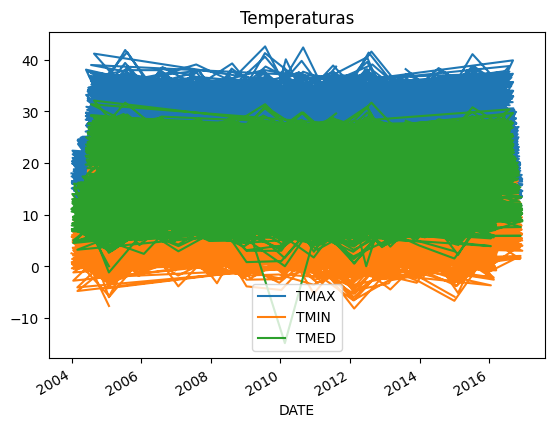

In [32]:
data.plot(y=['TMAX', 'TMIN', 'TMED'])
plt.title("Temperaturas")
plt.show()

<Axes: >

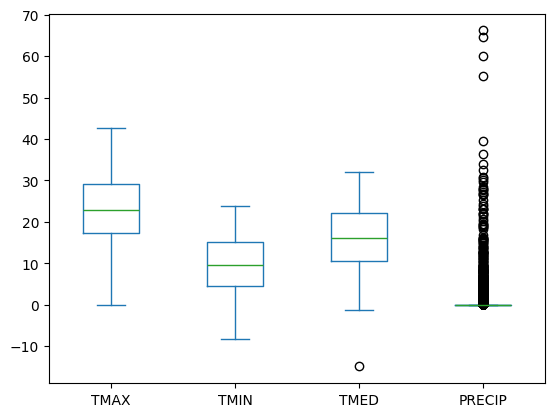

In [33]:
data.loc[:, 'TMAX':'PRECIP'].plot.box()

In [34]:
group_daily = data.groupby(["month", data.index.day])
daily_agg = group_daily.agg({
    'TMED':'mean',
    'TMAX':'max',
    'TMIN':'min',
    'PRECIP':'mean',
})
daily_agg.head(40)

TMED  TMAX  TMIN    PRECIP
month DATE                                
1     1     8.992308  20.6  -1.6  0.076923
      2     9.000000  20.9  -3.0  0.046154
      3     8.553846  21.0  -1.6  0.661538
      4     8.815385  22.8  -0.6  0.400000
      5     8.461538  21.7  -1.0  0.369231
      6     8.623077  26.3  -1.2  0.753846
      7     8.638462  22.9   0.1  3.307692
      8     8.084615  21.2  -1.5  0.323077
      9     8.238462  20.6  -2.6  0.200000
      10    7.430769  20.7  -4.6  0.723077
      11    9.215385  22.4  -0.6  1.153846
      12    8.300000  21.0  -1.8  0.061538
      13    8.307692  21.7  -1.6  0.169231
      14    8.923077  20.3  -0.5  0.061538
      15    8.561538  18.9  -1.8  0.107692
      16    8.338462  19.1  -2.1  0.707692
      17    8.253846  19.8  -3.7  0.107692
      18    9.161538  21.2  -3.8  0.476923
      19    8.961538  24.0  -2.8  1.215385
      20    8.746154  22.7  -2.3  0.015385
      21    8.084615  21.8  -1.0  0.030769
      22    8.700000  23.0  -3.2  0.107692
      23    8.938462  21.1  -1.1  0.246154
      24    8.653846  20.7  -3.8  0.307692
      25    8.415385  21.0  -3.9  0.630769
      26    8.030769  22.0  -2.4  5.169231
      27    7.861538  20.1  -6.0  2.784615
      28    8.225000  20.4  -7.7  0.400000
      29    7.992308  21.5  -3.3  0.507692
      30    8.161538  22.4  -3.0  0.200000
      31    8.107692  22.2  -5.8  0.107692
2     1     8.184615  22.0  -3.8  0.246154
      2     8.246154  20.8  -1.6  0.184615
      3     7.900000  19.4  -2.2  0.215385
      4     7.923077  20.3  -6.6  0.523077
      5     8.615385  33.0  -5.3  0.984615
      6     9.523077  38.7  -3.0  0.076923
      7     8.923077  28.9  -5.2  1.738462
      8     8.438462  20.0  -3.6  0.538462
      9     9.500000  32.9  -6.0  0.523077

In [35]:
monthly.TMAX.get_group((2015,8)).max()

37.0

In [36]:
yearly = data.groupby(by=['year'])

In [37]:
yearly_2010 = data.groupby(data.index.year).get_group(2010)
yearly_2010.PRECIP[yearly_2010.PRECIP > yearly_2010.PRECIP.mean()]

,PRECIP
DATE,
2010-03-02,19.4
2010-03-03,8.2
2010-01-04,1.8
2010-02-04,2.8
2010-01-05,3.8
2010-03-06,2.6
2010-12-06,4.2
2010-01-07,23.2
2010-02-08,2.2


In [38]:
yearly.TMIN.min().sort_values().head()

,TMIN
year,
2012,-8.2
2005,-7.7
2014,-6.7
2010,-5.3
2015,-5.2


In [39]:
yearly2 = data.groupby('year')
yearly2.TMAX.max().sort_values(ascending=False).head(1)

,TMAX
year,
2009,42.6


In [42]:
sin_precip = data[data['year'] == 2016]
sin_precip[sin_precip.PRECIP == 0]

,TMAX,TMIN,TMED,PRECIP,year,month
DATE,,,,,,
2016-01-01,18.2,4.1,10.9,0.0,2016,1
2016-02-01,21.5,4.4,12.1,0.0,2016,2
2016-03-01,20.5,0.0,9.9,0.0,2016,3
2016-04-01,17.5,5.6,12.2,0.0,2016,4
2016-05-01,19.8,11.4,14.9,0.0,2016,5
...,...,...,...,...,...,...
2016-03-31,22.5,6.9,14.5,0.0,2016,3
2016-05-31,26.0,12.8,19.8,0.0,2016,5
2016-07-31,38.8,21.5,30.4,0.0,2016,7


<Axes: xlabel='month,DATE'>

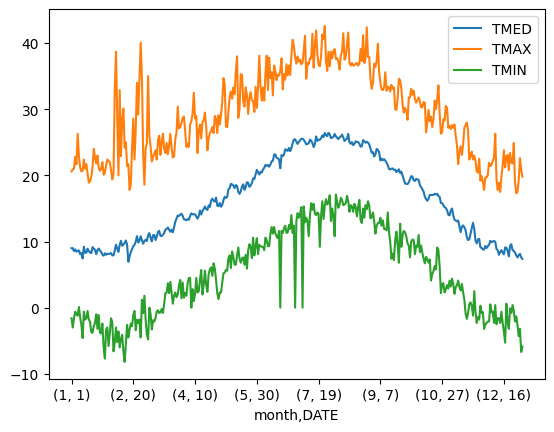

In [43]:
daily_agg.plot(y=['TMED','TMAX','TMIN'])